# SC1015 Assignment

## Table of Contents
---
1. Problem Statement  
    1.1 Motivation  
    1.2 Dataset Information
2. Imports
3. Data & Data Cleaning  
    3.1 Importing The Dataset  
    3.2 Brief Overview Of The Data  
    3.3 Categorising appropriate columns  
        3.3.1 Creating a new column to categorise flights  
        3.3.2 Creating a new column to get the expected Departure and Arrival times  
        3.3.3 Categorising Flight Delays By Length
    3.4 Removing Unnecessary Data
    3.5 Checking the completeness of the dataset  
4. Exploratory Data Analysis  
    4.1 Looking At Airlines  
    4.2 Types of Delays  
    4.3 Flights Categorised by Time  
        4.3.1 Calendar View  
        4.3.2 By Year  
        4.3.3 By Month  
        4.3.4 By Day Of Week  
    4.4 Flights Categorised By Location  
5. Creating a model  
    5.1 Machine Learning imports  
    5.2 Training  
    5.3 Baseline Models  
    5.4 Adding more features to the model  
    5.5 Polynomial Features  
6. Conclusion

---
## 1. Problem Statement
How can we predict a flight delay?

### 1.1 Motivation
In 2020, the COVID-19 pandemic forced many countries to impose strict travel restrictions, leading to a sharp decline in air travel and massive disruptions in people's plans. As the world gradually emerges from the pandemic and travel restrictions ease, more people are resuming their travel plans, either for leisure or for work. However, the uncertainty and inconvenience caused by flight delays can still cause significant stress and inconvenience for travelers. In this project, we aim to build a machine learning model that can predict the likelihood of flight delays, based on a range of factors such as the airline, the origin and destination airports, the time of day, and the day of the week. By providing accurate predictions of flight delays, our model can help travelers plan their trips better and avoid unnecessary stress and inconvenience.

### 1.2 Dataset Information
This dataset contains all flight information including cancellation and delays by airline from 2018 to 2022.  
The flights are limited to domestic flights within America.  

The original dataset can be found at https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022  
It is recommended to instead download the files from https://drive.google.com/drive/folders/11L423eF2E4aqQM66Ucd2vvKF-tdlGUMU?usp=sharing as the files have been renamed to "flights" instead of "Combined_Flights" and other large files that were not used is not in the drive.

## 2. Imports

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from plotly_calplot import calplot
import plotly.express as px
import seaborn as sb

pd.set_option("display.max_columns", 500)
plt.style.use('ggplot')

In [2]:
# Define the folder where the datasets are kept
root = "data/"

# Folder for images
image_root = "images/"

## 3. Data and Data Cleaning

### 3.1 Importing the dataset

The original dataset can be found at https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022  
It is recommended to instead download the files from https://drive.google.com/drive/folders/11L423eF2E4aqQM66Ucd2vvKF-tdlGUMU?usp=sharing as the files have been renamed to "flights" instead of "Combined_Flights" and other large files that were not used is not in the drive.

In [3]:
# Import the data from 2018 and 2019
years = [2018, 2019, 2020, 2021, 2022]
dataframes = []
column_subset = ['FlightDate',
                 'Airline',
                 'Operating_Airline',
                 'Origin',
                 'Dest',
                 'Cancelled',
                 'Diverted',
                 'CRSArrTime',
                 'CRSDepTime',
                 'DepTime',
                 'ArrTime',
                 'ArrDelayMinutes',
                 'DepDelayMinutes', 
                 'OriginAirportID',
                 'OriginCityName',
                 'OriginStateName',
                 'DestAirportID',
                 'DestCityName',
                 'DestStateName',
                 'Year',
                 'Month',
                 'DayofMonth',
                 'DayOfWeek',
                ]

for year in years:
    df = pd.read_parquet(f"{root}flights_{year}.parquet", columns=column_subset)
    dataframes.append(df)
del df

flights_df = pd.concat(dataframes).reset_index(drop=True)

### 3.2 Brief overview of the data

In [4]:
print(f"flights_df shape: {flights_df.shape}")

flights_df shape: (29193782, 23)


In [5]:
display(flights_df.describe())

CRSArrTime    CRSDepTime       DepTime       ArrTime  \
count  2.919378e+07  2.919378e+07  2.843213e+07  2.840760e+07   
mean   1.489004e+03  1.326262e+03  1.329296e+03  1.468046e+03   
std    5.072880e+02  4.823463e+02  4.949750e+02  5.256177e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.108000e+03  9.180000e+02  9.200000e+02  1.055000e+03   
50%    1.515000e+03  1.320000e+03  1.323000e+03  1.505000e+03   
75%    1.915000e+03  1.730000e+03  1.736000e+03  1.910000e+03   
max    2.400000e+03  2.359000e+03  2.400000e+03  2.400000e+03   

       ArrDelayMinutes  DepDelayMinutes  OriginAirportID  DestAirportID  \
count     2.834760e+07     2.843070e+07     2.919378e+07   2.919378e+07   
mean      1.280992e+01     1.278311e+01     1.267630e+04   1.267628e+04   
std       4.579959e+01     4.617337e+01     1.525445e+03   1.525449e+03   
min       0.000000e+00     0.000000e+00     1.013500e+04   1.013500e+04   
25%       0.000000e+00     0.000000e+00     1.129200e+04   1.129200e+04   
50%       0.000000e+00     0.000000e+00     1.288900e+04   1.288900e+04   
75%       6.000000e+00     5.000000e+00     1.405700e+04   1.405700e+04   
max       7.232000e+03     7.223000e+03     1.686900e+04   1.686900e+04   

               Year         Month    DayofMonth     DayOfWeek  
count  2.919378e+07  2.919378e+07  2.919378e+07  2.919378e+07  
mean   2.019829e+03  6.327840e+00  1.575161e+01  3.974879e+00  
std    1.342521e+00  3.452305e+00  8.778879e+00  2.002314e+00  
min    2.018000e+03  1.000000e+00  1.000000e+00  1.000000e+00  
25%    2.019000e+03  3.000000e+00  8.000000e+00  2.000000e+00  
50%    2.020000e+03  6.000000e+00  1.600000e+01  4.000000e+00  
75%    2.021000e+03  9.000000e+00  2.300000e+01  6.000000e+00  
max    2.022000e+03  1.200000e+01  3.100000e+01  7.000000e+00

In [6]:
flights_df.dtypes

FlightDate           datetime64[ns]
Airline                      object
Operating_Airline            object
Origin                       object
Dest                         object
Cancelled                      bool
Diverted                       bool
CRSArrTime                    int64
CRSDepTime                    int64
DepTime                     float64
ArrTime                     float64
ArrDelayMinutes             float64
DepDelayMinutes             float64
OriginAirportID               int64
OriginCityName               object
OriginStateName              object
DestAirportID                 int64
DestCityName                 object
DestStateName                object
Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
dtype: object

### 3.3 Categorising appropriate columns

In [7]:
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    flights_df[c] = flights_df[c].astype("category")

#### 3.3.1 Creating a new column to categorise flights
Defined as follows:
- Cancelled: Flights that are cancelled
    >if the Cancelled column value == 1  
- Delayed: If the arrival time is after the estimated arrival time
    >ArrDelayMinutes > 0  
- OnTime: Flights that are either early or on time
    >ArrDelayMinutes = 0 && Cancelled != 1

In [8]:
flights_df['DelaySituation'] = 'OnTime'
flights_df.loc[flights_df['Cancelled'], 'DelaySituation'] = 'Cancelled'
flights_df.loc[(flights_df['ArrDelayMinutes'] > 0) & (~flights_df['Cancelled']), 'DelaySituation'] = 'Delayed'

display(flights_df.head(10))

FlightDate            Airline Operating_Airline Origin Dest  Cancelled  \
0 2018-01-23  Endeavor Air Inc.                9E    ABY  ATL      False   
1 2018-01-24  Endeavor Air Inc.                9E    ABY  ATL      False   
2 2018-01-25  Endeavor Air Inc.                9E    ABY  ATL      False   
3 2018-01-26  Endeavor Air Inc.                9E    ABY  ATL      False   
4 2018-01-27  Endeavor Air Inc.                9E    ABY  ATL      False   
5 2018-01-28  Endeavor Air Inc.                9E    ABY  ATL      False   
6 2018-01-29  Endeavor Air Inc.                9E    ABY  ATL      False   
7 2018-01-30  Endeavor Air Inc.                9E    ABY  ATL      False   
8 2018-01-31  Endeavor Air Inc.                9E    ABY  ATL      False   
9 2018-01-03  Endeavor Air Inc.                9E    ATL  ABY      False   

   Diverted  CRSArrTime  CRSDepTime  DepTime  ArrTime  ArrDelayMinutes  \
0     False        1304        1202   1157.0   1256.0              0.0   
1     False        1304        1202   1157.0   1258.0              0.0   
2     False        1304        1202   1153.0   1302.0              0.0   
3     False        1304        1202   1150.0   1253.0              0.0   
4     False        1500        1400   1355.0   1459.0              0.0   
5     False        1304        1202   1202.0   1326.0             22.0   
6     False        1304        1202   1204.0   1303.0              0.0   
7     False        1304        1202   1153.0   1255.0              0.0   
8     False        1304        1202   1153.0   1304.0              NaN   
9     False        1137        1037   1101.0   1159.0             22.0   

   DepDelayMinutes  OriginAirportID OriginCityName OriginStateName  \
0              0.0            10146     Albany, GA         Georgia   
1              0.0            10146     Albany, GA         Georgia   
2              0.0            10146     Albany, GA         Georgia   
3              0.0            10146     Albany, GA         Georgia   
4              0.0            10146     Albany, GA         Georgia   
5              NaN            10146     Albany, GA         Georgia   
6              2.0            10146     Albany, GA         Georgia   
7              0.0            10146     Albany, GA         Georgia   
8              0.0            10146     Albany, GA         Georgia   
9             24.0            10397    Atlanta, GA         Georgia   

   DestAirportID DestCityName DestStateName  Year  Month  DayofMonth  \
0          10397  Atlanta, GA       Georgia  2018      1          23   
1          10397  Atlanta, GA       Georgia  2018      1          24   
2          10397  Atlanta, GA       Georgia  2018      1          25   
3          10397  Atlanta, GA       Georgia  2018      1          26   
4          10397  Atlanta, GA       Georgia  2018      1          27   
5          10397  Atlanta, GA       Georgia  2018      1          28   
6          10397  Atlanta, GA       Georgia  2018      1          29   
7          10397  Atlanta, GA       Georgia  2018      1          30   
8          10397  Atlanta, GA       Georgia  2018      1          31   
9          10146   Albany, GA       Georgia  2018      1           3   

   DayOfWeek DelaySituation  
0          2         OnTime  
1          3         OnTime  
2          4         OnTime  
3          5         OnTime  
4          6         OnTime  
5          7        Delayed  
6          1         OnTime  
7          2         OnTime  
8          3         OnTime  
9          3        Delayed

#### 3.3.2 Creating a new column to get the expected Departure and Arrival times

In [9]:
time_cols = ["ArrTime", "DepTime", "CRSArrTime", "CRSDepTime"]
for col in time_cols:
    flights_df[col] = flights_df[col].fillna(0)
    flights_df[col] = pd.to_numeric(flights_df[col], errors='coerce')
    flights_df[col] = flights_df[col].astype(int)
    flights_df[col] = flights_df[col].astype(str)

In [10]:
def combine_date_time(date_col, time_col, new_col_name):
    date_str = flights_df[date_col].astype(str)
    time_str = flights_df[time_col].astype(str)
    time_str = time_str.apply(lambda x: x.zfill(4) if len(x) < 4 else x.rjust(4, '0'))
    datetime_str = date_str + ' ' + time_str
    
    flights_df[new_col_name] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H%M')


In [11]:
combine_date_time("FlightDate", "CRSDepTime", "CRSDepFlightDate")

In [12]:
flights_df.loc[:5, ["CRSDepFlightDate", "CRSDepTime", "DepTime", "DepDelayMinutes", "CRSArrTime", "ArrTime", "ArrDelayMinutes"]]

CRSDepFlightDate CRSDepTime DepTime  DepDelayMinutes CRSArrTime ArrTime  \
0 2018-01-23 12:02:00       1202    1157              0.0       1304    1256   
1 2018-01-24 12:02:00       1202    1157              0.0       1304    1258   
2 2018-01-25 12:02:00       1202    1153              0.0       1304    1302   
3 2018-01-26 12:02:00       1202    1150              0.0       1304    1253   
4 2018-01-27 14:00:00       1400    1355              0.0       1500    1459   
5 2018-01-28 12:02:00       1202    1202              NaN       1304    1326   

   ArrDelayMinutes  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5             22.0

#### 3.3.3 Categorising Flight Delays By Length
Based on: https://en.wikipedia.org/wiki/Flight_cancellation_and_delay
Flight delays can be categorised into 3 different categories.
- Small Delays (Up to 15 minutes)
- Medium Delays (15 - 45 minutes) 
- Large Delays (More than 45 minutes)

In [13]:
bins = [1, 15, 45, np.inf]
labels = ['SmallDelays', 'MediumDelays', 'LargeDelays']
flights_df['DelayCategory'] = pd.cut(flights_df['ArrDelayMinutes'], bins=bins, labels=labels, right=False)

### 3.4 Removing Unnecessary Data
As stated in the motivation, COVID-19 had a large impact on flights. Many flights were simply cancelled and the aviation landscape was destabilised.  
Between 24th March 2020 - 2nd June 2021, there was a significantly light period of flight delays due to the low number of flights in comparison to years before COVID-19. This imbalance would weigh too much if they were included in the analysis and training. Hence, 2020 and 2021 were removed.  
Additionally, 2022 is also removed as the the data for that year is incomplete.

#### Calendar View

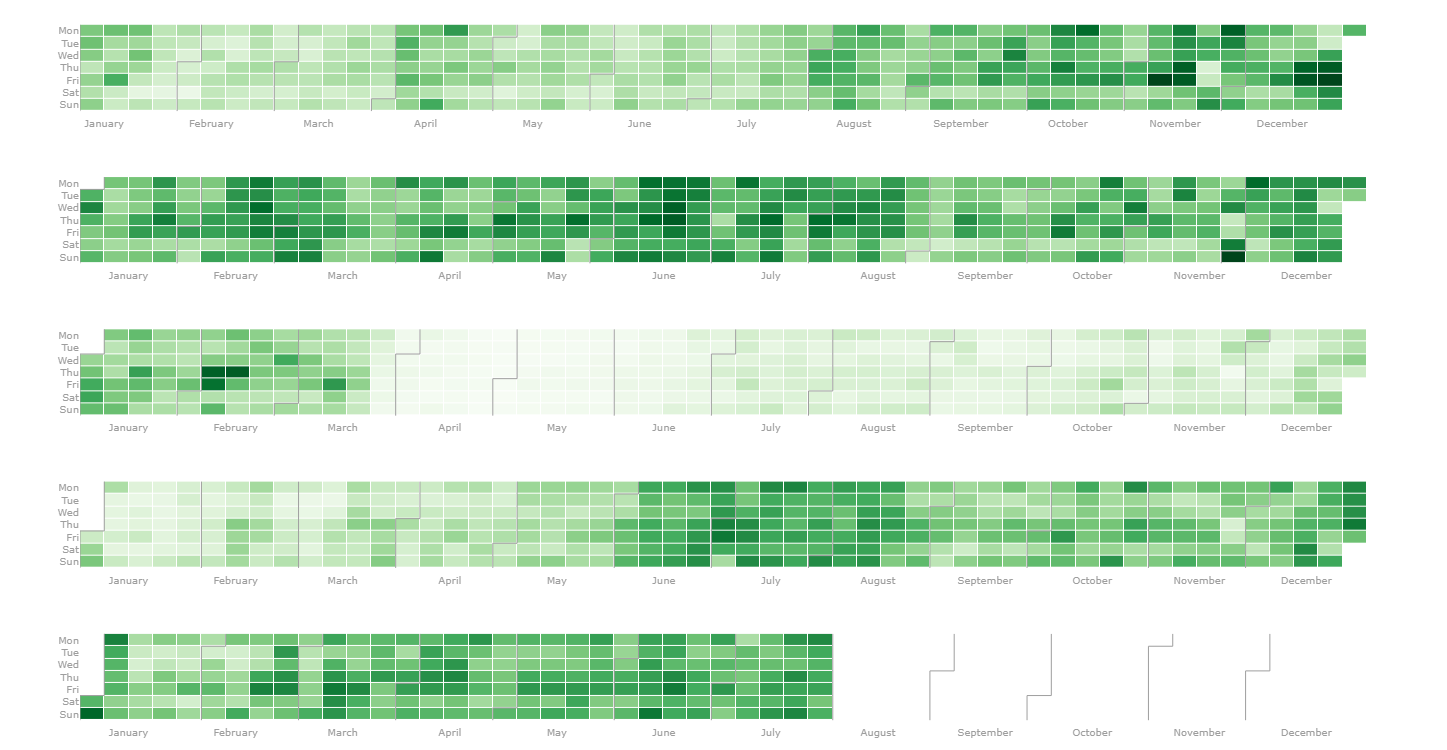

In [14]:
delayed_events = flights_df[flights_df['DelaySituation'] == 'Delayed']
delayed_events = delayed_events.groupby('FlightDate')['DelaySituation'].count().reset_index(name='DelaySituation')
fig = calplot(delayed_events, x='FlightDate', y='DelaySituation')
fig.show()

In [15]:
# Removing the aforementioned years
mask = flights_df['Year'].isin([2020, 2021, 2022])
flights_df = flights_df[~mask]

### 3.5 Checking how complete the dataset is

In [16]:
missing_df = flights_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights_df.shape[0]-missing_df['missing values'])/flights_df.shape[0]*100
display(missing_df.sort_values('filling factor (%)').reset_index(drop = True).head(5))

variable  missing values  filling factor (%)
0    DelayCategory         9033637           34.449543
1  ArrDelayMinutes          277313           97.987744
2  DepDelayMinutes          234493           98.298457
3           Origin               0          100.000000
4   DelaySituation               0          100.000000

## 4. Exploratory Data Analysis

### 4.1 Looking At Airlines
This is a a quick count to see which airline has the highest number of flights

In [18]:
flights_df['Airline'].value_counts()

Southwest Airlines Co.                       2716498
Delta Air Lines Inc.                         1453704
SkyWest Airlines Inc.                        1368547
American Airlines Inc.                       1331959
United Air Lines Inc.                        1247475
JetBlue Airways                               602421
Republic Airlines                             533125
Envoy Air                                     454834
Alaska Airlines Inc.                          449568
Comair Inc.                                   406121
Mesa Airlines Inc.                            381528
Spirit Air Lines                              381023
Endeavor Air Inc.                             377276
ExpressJet Airlines Inc.                      301457
Frontier Airlines Inc.                        255578
Horizon Air                                   207142
Air Wisconsin Airlines Corp                   205657
Allegiant Air                                 201526
Hawaiian Airlines Inc.                        

Then, a dataframe of the airlines was created to find the percentage of Cancelled, Delayed and OnTime flights.

In [19]:
flights_df['Airline'] = flights_df['Airline'].astype('category')
airline_df = flights_df.groupby('Airline')['DelaySituation'].value_counts().unstack()


total_flights = airline_df.sum(axis=1)
print(type(total_flights))
for value in airline_df.columns:
    airline_df[value] = (airline_df[value] / total_flights)*100

total_flights = total_flights.sort_values(ascending=False).index

<class 'pandas.core.series.Series'>


In [20]:
airline_df.loc[total_flights].sort_values('OnTime', ascending=False)\
[['OnTime','Delayed','Cancelled']]\
.style.background_gradient(axis=0,cmap='YlOrRd')

For clearer visualisation, a horizontal bar graph was used to visualise which airline had the highest percentage of delayed flights

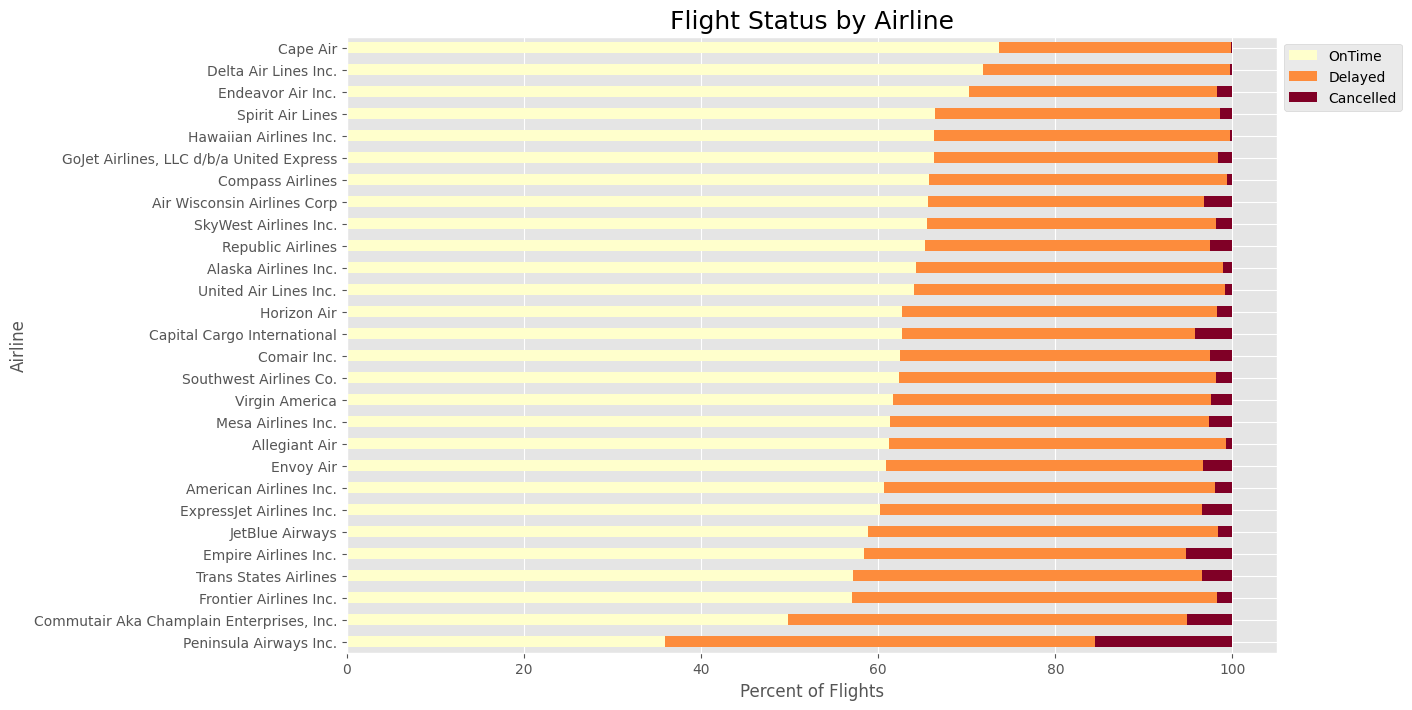

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
airline_df.sort_values('OnTime')[['OnTime','Delayed','Cancelled']].plot(kind='barh', stacked=True, ax=ax, cmap='YlOrRd')
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Flight Status by Airline', fontsize=18)
ax.set_xlabel('Percent of Flights')
plt.show()

fig.savefig(f'{image_root}FlightStatusByAirline_barh.png')

### 4.2 Types of Delays

Flight Delays can be categorised by length of the delay as categorised by https://en.wikipedia.org/wiki/Flight_cancellation_and_delay

In [23]:
flights_df['DelayCategory'].value_counts()

SmallDelays     2131762
MediumDelays    1415243
LargeDelays     1200554
Name: DelayCategory, dtype: int64

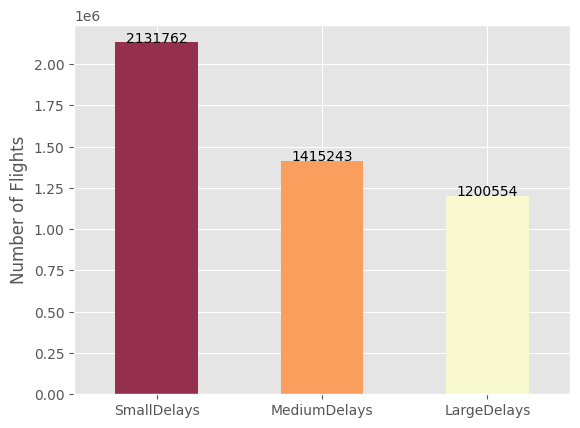

In [26]:
category_counts = flights_df['DelayCategory'].value_counts()
custom_palette = ['#942f4d', '#f99e5d', '#f9f9d0']
ax = category_counts.plot(kind='bar', color = custom_palette)
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel('Number of Flights')

for i, v in enumerate(category_counts):
    ax.text(i, v + 1000, str(v), ha='center')


plt.savefig(f'{image_root}categoryCounts.png')
plt.show()

### 4.3 Flights Categorised by Time

#### 4.3.1 Calendar View

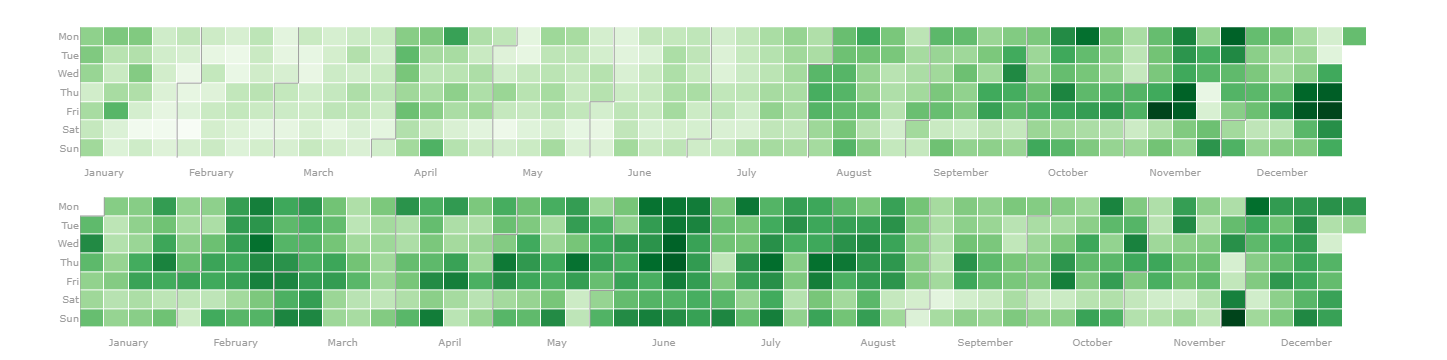

In [31]:
delayed_events = flights_df[flights_df['DelaySituation'] == 'Delayed']
delayed_events = delayed_events.groupby('FlightDate')['DelaySituation'].count().reset_index(name='DelaySituation')
fig = calplot(delayed_events, x='FlightDate', y='DelaySituation')

fig.show()

#### 4.3.2 By Year

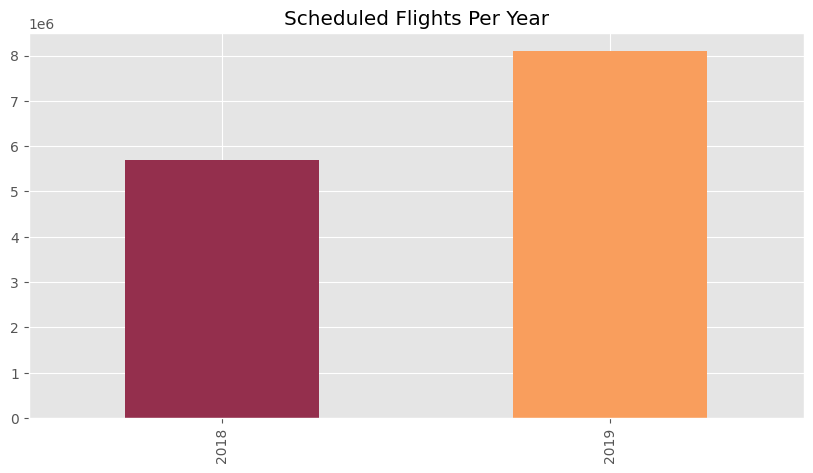

In [33]:
flights_df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year",  color = custom_palette)
    

plt.savefig(f'{image_root}ScheduledFlightsPerYear.png')
plt.show()

#### 4.3.3 By Month

In [45]:
month_df = flights_df.groupby('Month')['DelaySituation'].value_counts().unstack()

display(month_df)
total_flights = month_df.sum(axis=1)


DelaySituation  Cancelled  Delayed  OnTime
Month                                     
1                   32240   352983  711114
2                   23501   323212  504358
3                   22501   342935  669917
4                   20504   378450  752288
5                   18496   372013  653846
6                   18973   405088  588121
7                   21023   397117  666765
8                   24572   451347  745149
9                   20548   376302  901476
10                  11335   445570  906129
11                  13330   425442  855285
12                  14979   477100  837187

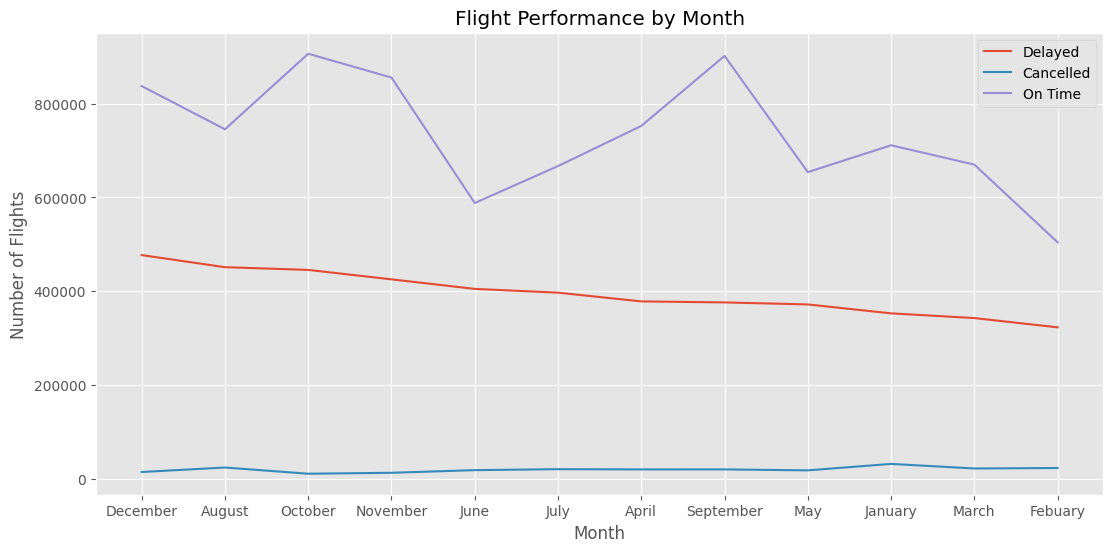

In [26]:
plt.figure(figsize=(13, 6))
custom_palette = ['#942f4d', '#f99e5d', '#f9f9d0']
month_df = month_df.sort_values(by='Delayed', ascending=False)
# plot the data
plt.plot(month_df.index, month_df['Delayed'], label='Delayed')
plt.plot(month_df.index, month_df['Cancelled'], label='Cancelled')
plt.plot(month_df.index, month_df['OnTime'], label='On Time')
plt.plot(color=custom_palette)
# add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Flight Performance by Month')
plt.legend()

A line graph displaying the above information

#### 4.3.4 By Day Of Week

In [47]:
week_df = flights_df.groupby('DayOfWeek')['DelaySituation'].value_counts().unstack()
week_df.describe()
total_flights = week_df.sum(axis=1)
display(week_df)
print(type(total_flights))
for value in week_df.columns:
    week_df[value] = (week_df[value] / total_flights)*100

total_flights = total_flights.sort_values(ascending=False).index

week_df.loc[total_flights].sort_values('Delayed', ascending=False) \
    [['Delayed', 'OnTime','Cancelled']] \
    .style.background_gradient(axis=0,cmap='YlOrRd')

DelaySituation  Cancelled  Delayed   OnTime
DayOfWeek                                  
1                   37223   726234  1303484
2                   35743   655235  1291983
3                   41522   671904  1283100
4                   39341   748731  1241293
5                   31055   757904  1254820
6                   23729   521608  1147162
7                   33389   665943  1269793

<class 'pandas.core.series.Series'>


### 4.4 Flights Categorised By Location

#### 4.4.1 Destination City

In [50]:
DestAirports_df = flights_df.groupby('DestCityName')['DelaySituation'].value_counts().unstack()
DestAirports_df.describe()
total_flights = DestAirports_df.sum(axis=1)
display(type(total_flights))
for value in DestAirports_df.columns:
    DestAirports_df[value] = (DestAirports_df[value] / total_flights)*100

total_flights = total_flights.sort_values(ascending=False).index

chart = DestAirports_df.loc[total_flights].sort_values('Delayed', ascending=False) \
    [['Delayed', 'OnTime','Cancelled']] \
    .style.background_gradient(axis=0,cmap='YlOrRd')

display(chart)

pandas.core.series.Series

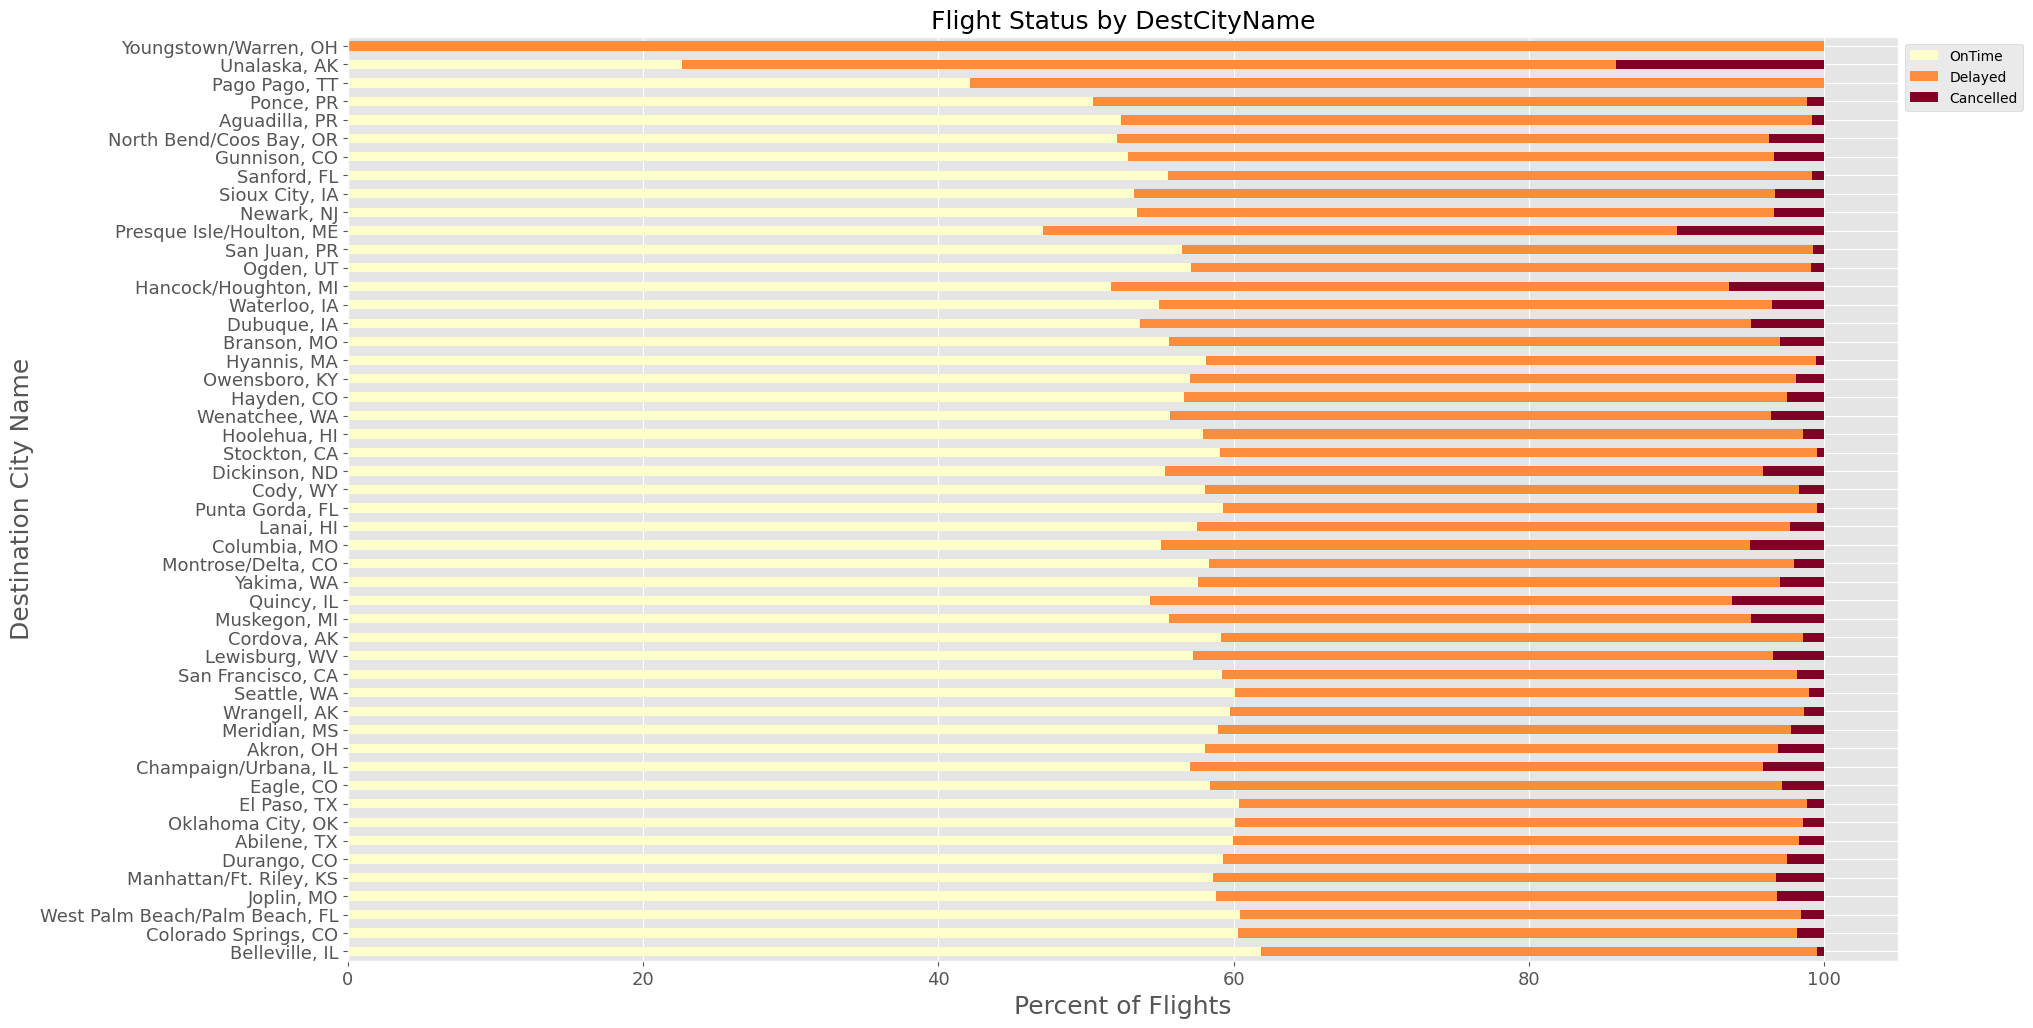

In [53]:
flights_df['DestCityName'] = flights_df['DestCityName'].astype('category')
destcity_df = flights_df.groupby('DestCityName')['DelaySituation'].value_counts().unstack()

total_flights = destcity_df.sum(axis=1)

for value in destcity_df.columns:
    destcity_df[value] = (destcity_df[value] / total_flights)*100
    


total_flights = total_flights.sort_values(ascending=False).index
destcity_df = destcity_df.sort_values(by='Delayed', ascending=False)
destcity_df = destcity_df.head(50)


fig, ax = plt.subplots(figsize=(20, 12))
destcity_df.sort_values('Delayed')[['OnTime','Delayed','Cancelled']].plot(kind='barh', stacked=True, ax=ax, cmap='YlOrRd', fontsize=13)
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Flight Status by DestCityName', fontsize=18)
ax.set_xlabel('Percent of Flights', fontsize=18)
ax.set_ylabel('Destination City Name', fontsize=18)
plt.savefig(f'{image_root}Top50CitiesDelayed')
plt.show()

Above are the top 50 cities with flight delays

## 5. Creating a model

The goal of the model is to be able to predict whether a flight will be delayed or not. From the motivation, we want to be able to predict flight delays using factors that a consumer is able to control.

### 5.1 Machine Learning imports

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error

### 5.2 Training
Creating the training dataset. To start with a simple baseline, just 'Airline' will be used to try and predict if a flight will be delayed.


In [55]:
x = flights_df[['Airline']]
y = flights_df['DelaySituation']

encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_test, y_test, test_size=0.2, random_state=42)

le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)


### 5.3 Baseline Models
Since we are only trying to get a baseline, we picked the following models which support multiclass labels to judge their performance:
- DecisionTreeClassifier
- ExtraTreeClassifier
- BernoulliNB
- BaggingClassifier
- RandomForestClassifier

In [56]:
def gen_matrix_plot(y_train, train_preds, y_test, test_preds, name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
    
    # Confusion matrix plot for train set
    cm_train = confusion_matrix(y_train, train_preds)
    sb.heatmap(cm_train, annot=True, fmt='d', ax=ax1)
    ax1.set_title(f"{name} Train Confusion Matrix")
    
    # Confusion matrix plot for test set
    cm_test = confusion_matrix(y_test, test_preds)
    sb.heatmap(cm_test, annot=True, fmt='d', ax=ax2)
    ax2.set_title(f"{name} Test Confusion Matrix")
    
    plt.tight_layout()
    plt.show()
    
def train_models(x_train, y_train, x_test, y_test, model_algo, name):
    
    if name == "BernoulliNB":
        pipe = make_pipeline(model_algo)
        pipe.fit(x_train, y_train)
    else:
        pipe = make_pipeline(preprocessing.StandardScaler(with_mean=False), model_algo)
        pipe.fit(x_train, y_train)

    # Predictions
    train_preds = pipe.predict(x_train)
    test_preds = pipe.predict(x_test)
    
    # Metrics
    metrics_mat = {}
    metrics_mat['name'] = name

    # Train metrics
    metrics_mat['train_accuracy'] = accuracy_score(y_train, train_preds)
    metrics_mat['train_f1_score'] = f1_score(y_train, train_preds, average='weighted')

    # Test metrics
    metrics_mat['test_accuracy'] = accuracy_score(y_test, test_preds)
    metrics_mat['test_f1_score'] = f1_score(y_test, test_preds, average='weighted')
    
    gen_matrix_plot(y_train, train_preds, y_test, test_preds, name)
    
    return metrics_mat

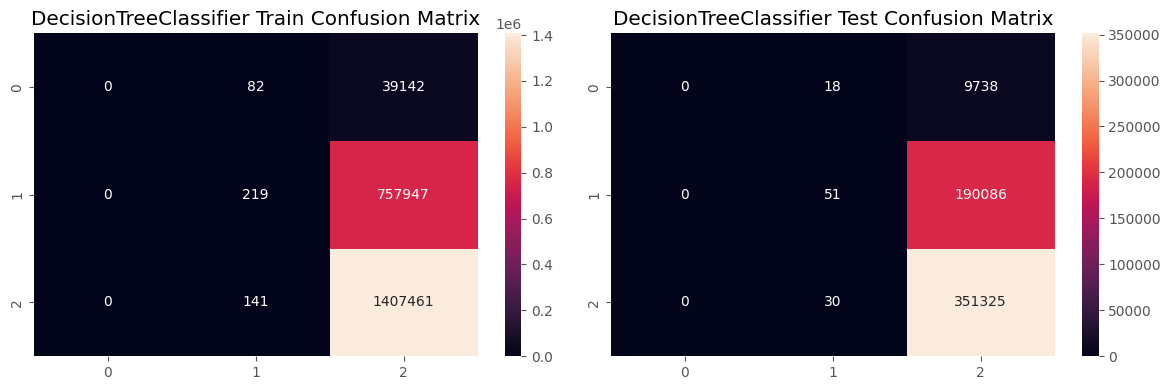

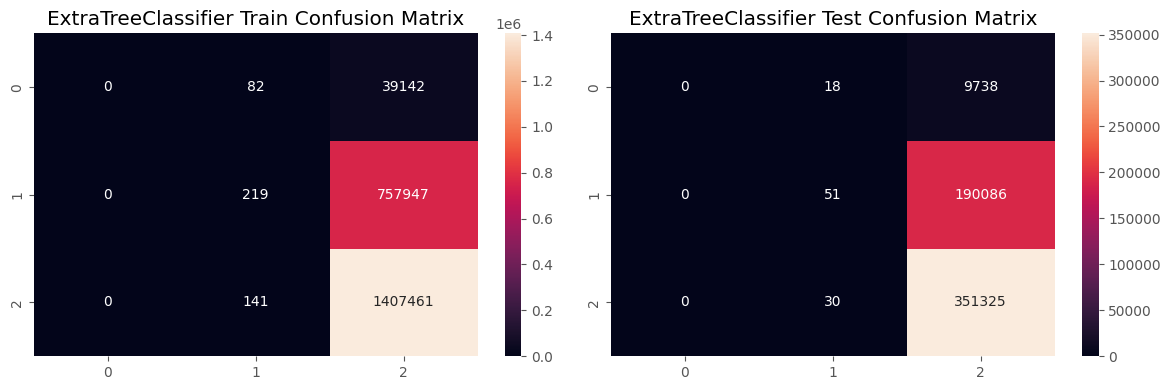

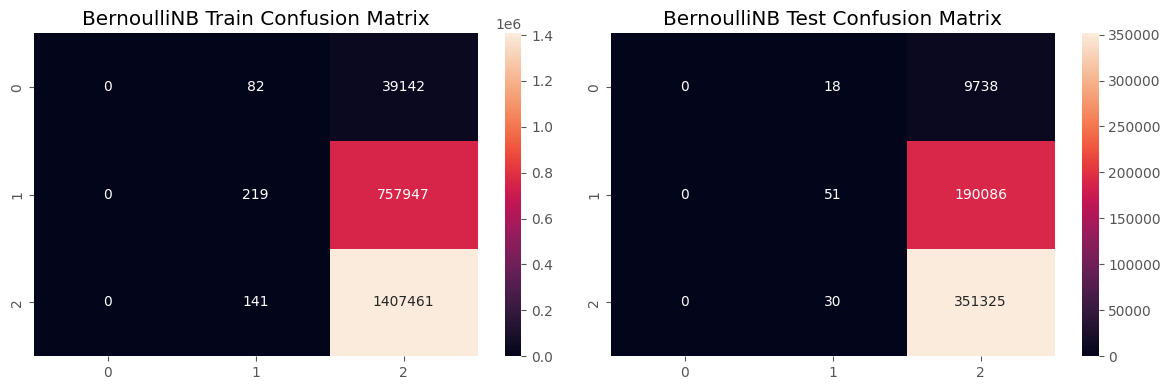

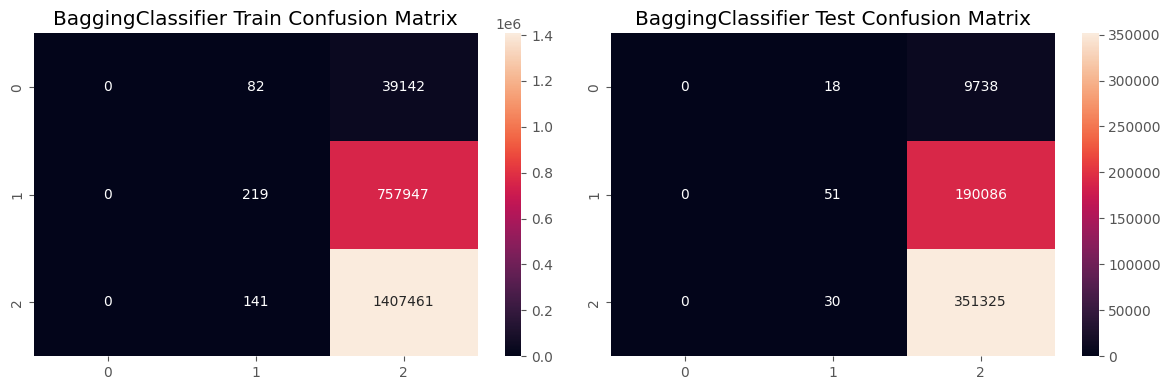

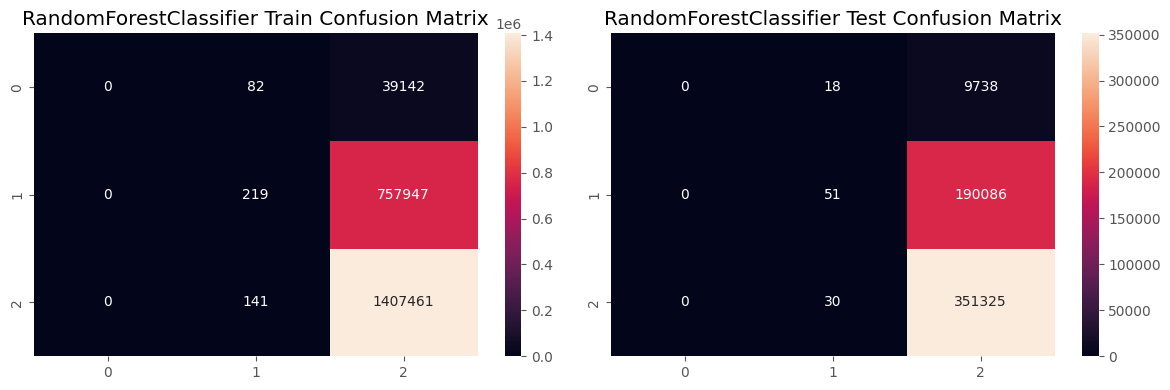

name  train_accuracy  train_f1_score  test_accuracy  \
0  DecisionTreeClassifier        0.638406        0.497676       0.637419   
1     ExtraTreeClassifier        0.638406        0.497676       0.637419   
2             BernoulliNB        0.638406        0.497676       0.637419   
3       BaggingClassifier        0.638406        0.497676       0.637419   
4  RandomForestClassifier        0.638406        0.497676       0.637419   

   test_f1_score  
0       0.496422  
1       0.496422  
2       0.496422  
3       0.496422  
4       0.496422

In [57]:
models = [
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    BernoulliNB(),
    BaggingClassifier(),
    RandomForestClassifier()
]

names = [
    'DecisionTreeClassifier',
    'ExtraTreeClassifier',
    'BernoulliNB',
    'BaggingClassifier',
    'RandomForestClassifier',
]

results = []
for model, name in zip(models, names):
    metrics = train_models(x_train, y_train, x_test, y_test, model, name)
    results.append(metrics)

results_df = pd.DataFrame(results)
display(results_df)

Strangely enough, there was no difference between the models and additionally, the model performed very poorly with the tendency to categorise almost everything as 2.

### 5.4 Adding more features to the models
This time, more features will be added to the model to attempt to see if it can be improved
- Airline
- Origin
- Destination ('Dest')
- Month
- The day of the week ('DayOfWeek')

In [58]:
x = flights_df[['Airline', 'Origin', 'Dest', 'Month', 'DayOfWeek']].copy()
y = flights_df['DelaySituation'].copy()

# Label encoding the categorical features
le = LabelEncoder()
for col in ['Airline', 'Origin', 'Dest']:
    x[col] = le.fit_transform(x[col])

# Label encoding the target variable
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

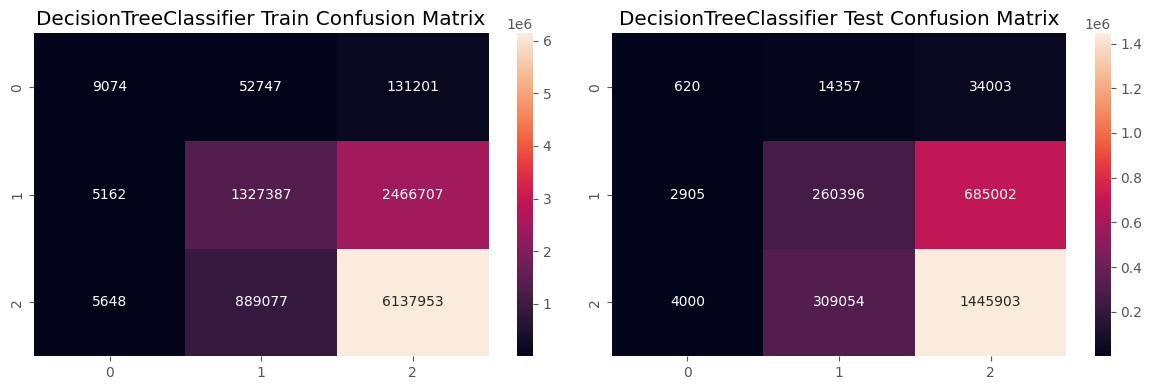

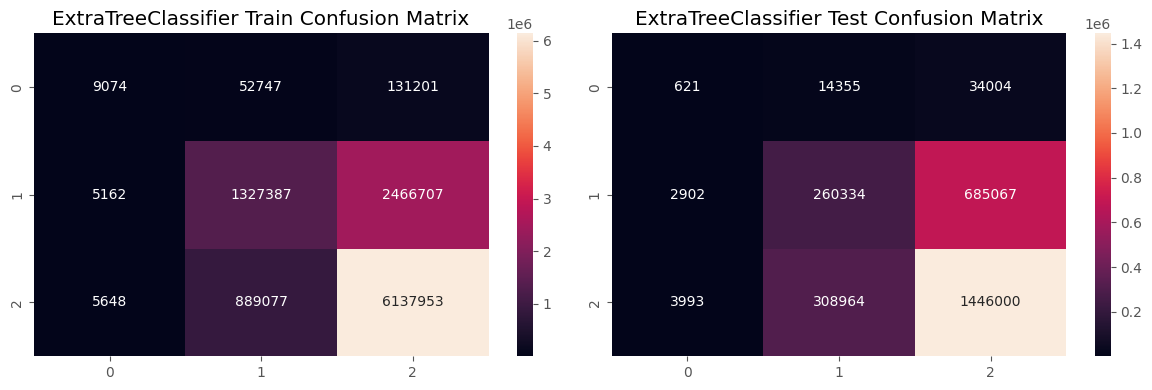

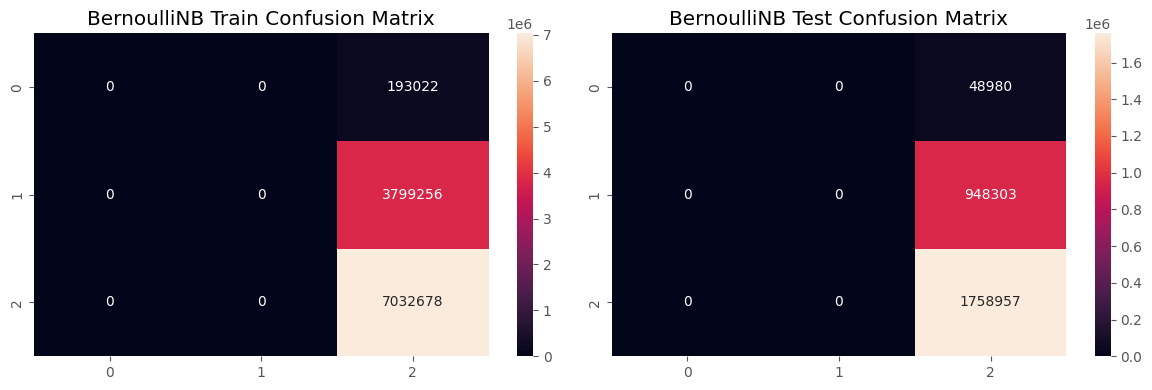

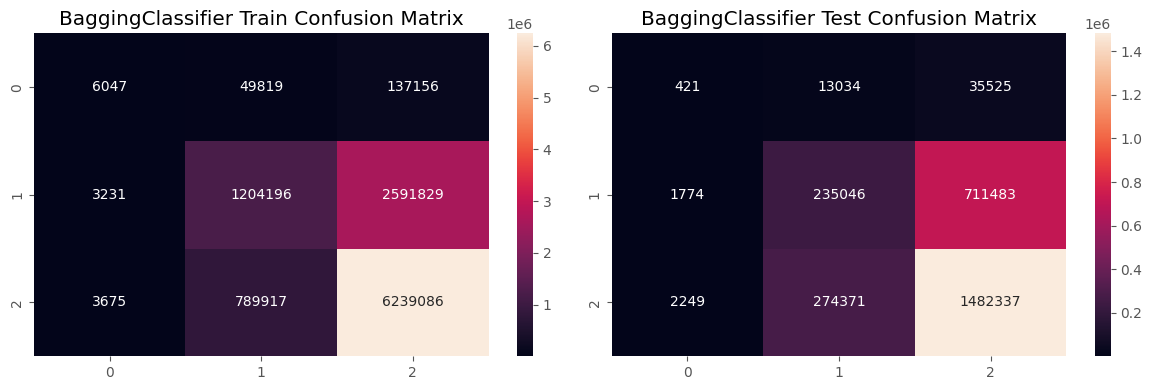

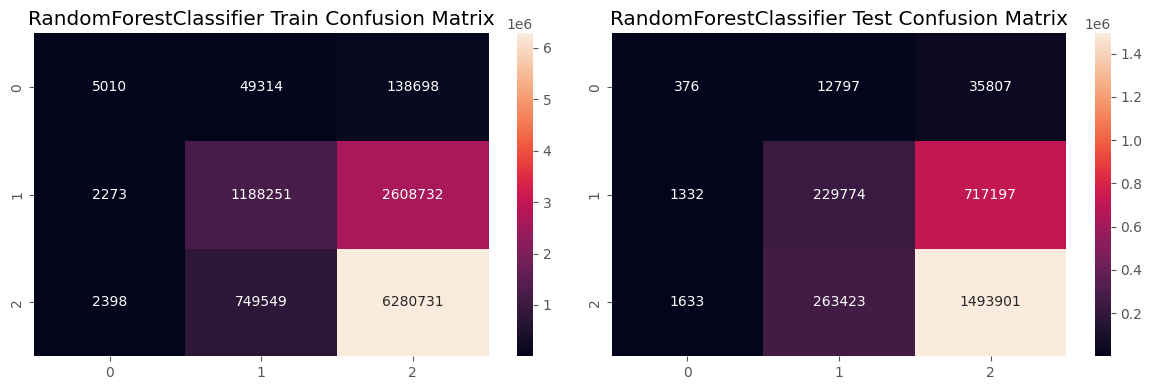

name  train_accuracy  train_f1_score  test_accuracy  \
0  DecisionTreeClassifier        0.677954        0.648846       0.619293   
1     ExtraTreeClassifier        0.677954        0.648846       0.619306   
2             BernoulliNB        0.637887        0.496860       0.638173   
3       BaggingClassifier        0.675679        0.640520       0.623242   
4  RandomForestClassifier        0.677916        0.641300       0.625508   

   test_f1_score  
0       0.587661  
1       0.587658  
2       0.497218  
3       0.584631  
4       0.584961

In [59]:
results = []
for model, name in zip(models, names):
    metrics = train_models(x_train, y_train, x_test, y_test, model, name)
    results.append(metrics)

results_df = pd.DataFrame(results)
display(results_df)

After adding more features, there are more visible differences between the models.  
These are the observations and their test F1 scores:
- Decision Tree and Extra Tree (0.587667, 0.587676)
    These 2 models are already very similiar to begin with and ended up having better (and simliar) results with the Extra Tree model having *slightly* higher accuracy
- BernoulliNB (0.497218)  
    This model had very poor accuracy  
    As seen from the confusion matrix, it classified everything as 2 which would not help in predicting flight delays at all.
- Bagging and Random Forest (0.584715, 0.585017)  
    These 2 models also had improved with the addition of features

Hence, from these observations the following models will be dropped from improvement:
- Decision Tree (Simliar to Extra Tree)
- BernoulliNB (Poor accuracy)

### 5.5 Polynomial Features
In an attempt to improve the model 

In [62]:
models = [
    DecisionTreeClassifier(),
    BaggingClassifier(),
    RandomForestClassifier()
]

names = [
    'DecisionTreeClassifier',
    'BaggingClassifier',
    'RandomForestClassifier',
]

In [63]:
# Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

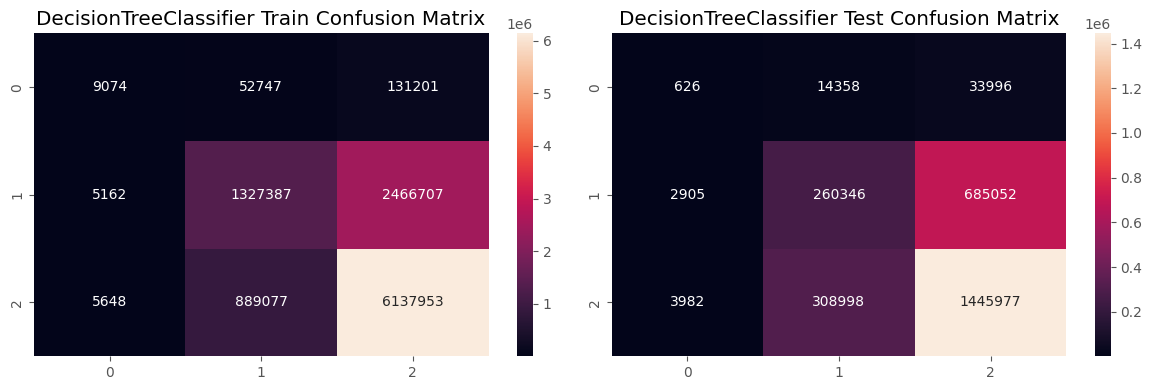

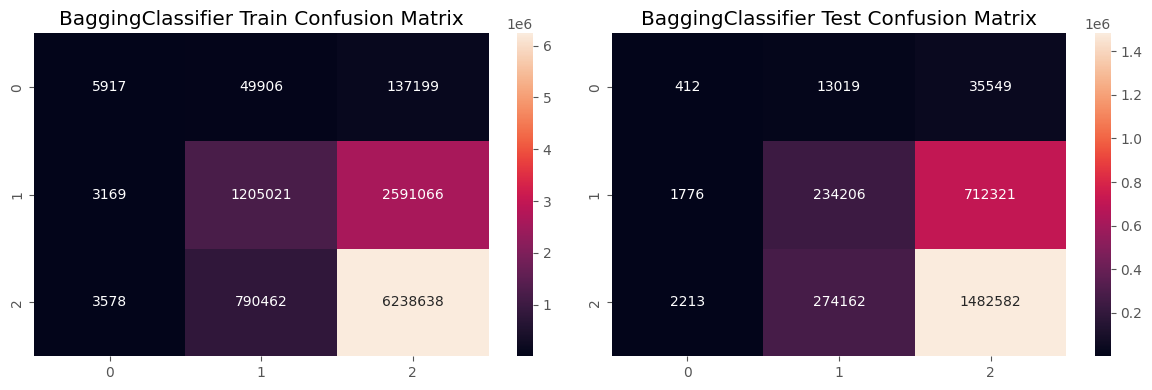

In [ ]:
results = []
for model, name in zip(models, names):
    metrics = train_models(x_train, y_train, x_test, y_test, model, name)
    results.append(metrics)

results_df = pd.DataFrame(results)
display(results_df)

After using polynomial features instead, there was little improvement in accuracy.
These are the observations(old F1 score, new F1 score):
- Extra Tree (0.587676, 0.587662)  
- Bagging (0.584715, 0.584616)
- Random Forest (0.585017, 0.585028)  

With the exception of the Random Forest which had barely noticeable improvements in accuracy, everything else did not improve the models accuracy. This could have been because polynomial features would be more effective in regression models as opposed to tree models

## 6. Conclusion

### Conclusions
- Covid had a heavy impact on the aviation landscape
- Features that can affect delays:
    - Airline
    - Origin
    - Destination ('Dest')
    - Month
    - The day of the week ('DayOfWeek')
- Polynomial Features do not affect performance of tree models but regression models instead
- Too little features is likely to have poor accuracy and adding more features and data to the model is likely to help improve the model
- Decision Tree and Extra Tree models are very simliar